In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt



STEP 1: Edge Detection


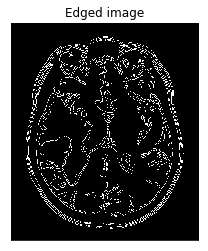

In [4]:
##-----------------------Canny Edge Detection------------------------##

# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("images/brain.jpg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500, width = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Image')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1, 2, 2) # row, col, current_col
# plt.imshow(edged, cmap='gray')
# plt.title("Edged image")
# plt.xticks([]), plt.yticks([])

plt.imshow(edged, cmap='gray')
plt.title("Edged image")
plt.xticks([]), plt.yticks([])
plt.show()

plt.show()



STEP 2: Find contours of paper


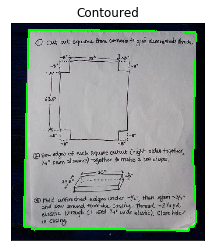

In [3]:
##-----------------------Contouring------------------------##


# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

 
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cnt = cnts[1]
#draw individual contours
# cv2.drawContours(image, cnts, 3, (0,255,0), 3)
# cv2.drawContours(image, cnts, 1, (0,255,0), 3)

#draw all the contours
#cv2.drawContours(image, cnts, -1, (0,255,0), 3)

#draw 0th contour
cv2.drawContours(image, cnts, 0, (0,255,0), 3)

plt.imshow(image)
plt.title("Contoured")
plt.xticks([]), plt.yticks([])
plt.show()